In [2]:
import numpy as np
import matplotlib
import pandas as pd

from scipy.stats import norm

import matplotlib.pyplot as plt
from tqdm import tqdm
import time

%matplotlib inline

In [3]:
S0 = 100
K = 100
r = 0.05
sigma = 0.15
mu = 0.05
M = 1

T = 12
N_MC = 1000

delta_t = M/T
gamma = np.exp(-r*delta_t)

In [5]:
N = 25
I = (2+np.log(np.log(N))) * sigma * np.sqrt(T*delta_t)
p = np.log(S0) + (2*np.arange(1,N+1)-N-1)/(N-1)*I
p = pd.DataFrame(p,index=range(1,N+1))
c = (p.loc[2:,:]+p.shift(1).loc[2:,:])/2
c.loc[1,:] = float('-inf')
c.loc[N+1,:] = float('inf')
c = c.sort_index(axis = 0)

In [6]:
transition_probability = pd.DataFrame([],index=range(1,N+1),columns=range(1,N+1))

for i in range(1,N+1):
    for j in range(1,N+1):
        a = (c.loc[j+1,0]-p.loc[i,0] - (mu-0.5*sigma**2)*delta_t)/(sigma*np.sqrt(delta_t))
        b = (c.loc[j,0]-p.loc[i,0]-(mu-0.5*sigma**2)*delta_t)/(sigma*np.sqrt(delta_t))
        transition_probability.loc[i,j] = norm.cdf(a)-norm.cdf(b)
transition_probability = transition_probability.astype('float')

In [8]:
transition_probability.head()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
1,0.649079,0.253718,0.083736,0.012585,0.000856,0.000026,3.559046e-07,2.150213e-09,5.734302e-12,6.772360e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.297368,0.351711,0.253718,0.083736,0.012585,0.000856,2.612709e-05,3.559046e-07,2.150213e-09,5.734302e-12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.073976,0.223393,0.351711,0.253718,0.083736,0.012585,8.556188e-04,2.612709e-05,3.559046e-07,2.150213e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.009097,0.064878,0.223393,0.351711,0.253718,0.083736,1.258474e-02,8.556188e-04,2.612709e-05,3.559046e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000526,0.008572,0.064878,0.223393,0.351711,0.253718,8.373581e-02,1.258474e-02,8.556188e-04,2.612709e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
starttime = time.time()

X = pd.DataFrame([],index = range(1,N_MC+1),columns=range(T+1))
X.loc[:,0] = np.log(S0)

point = pd.DataFrame([], index=range(1,N_MC+1),columns=range(T+1))
point.loc[:,0] = (N+1)/2

for k in range(1,N_MC+1):
    x = (N + 1)/2
    for t in range(1,T+1):
        next_x = np.random.choice(np.arange(1,N+1),replace=True,p=transition_probability.loc[x,:])
        x = next_x
        point.loc[k,t] = x
        X.loc[k,t] = p.loc[x,0]

point = point.astype('int')

endtime = time.time()
print('\nTime Cost:', endtime - starttime, 'seconds')

/var/folders/ph/291tj9bj5qqdx2qf5h64qv580000gn/T/ipykernel_49563/3793298053.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,0] = np.log(S0)
/var/folders/ph/291tj9bj5qqdx2qf5h64qv580000gn/T/ipykernel_49563/3793298053.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  point.loc[:,0] = (N+1)/2



Time Cost: 1.219984769821167 seconds


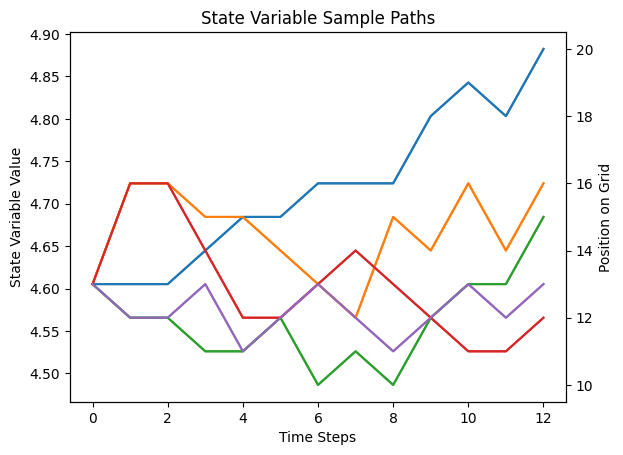

In [11]:
# plot 5 paths
plt.plot(X.T.iloc[:,[100,200,300,400,500]])
plt.xlabel('Time Steps')
plt.ylabel('State Variable Value')
plt.twinx()
plt.plot(point.T.iloc[:,[100,200,300,400,500]])
plt.xlabel('Time Steps')
plt.ylabel('Position on Grid')
plt.title('State Variable Sample Paths')
plt.show()

In [12]:
S = X.apply(lambda x: np.exp((x+(mu-1/2*sigma**2)*np.arange(T+1)*delta_t).astype('float')),axis=1)
delta_S = S.loc[:,1:T].values -np.exp(r*delta_t)*S.loc[:,0:T-1]
delta_S_hat = delta_S.apply(lambda x:x-np.mean(x),axis=0)

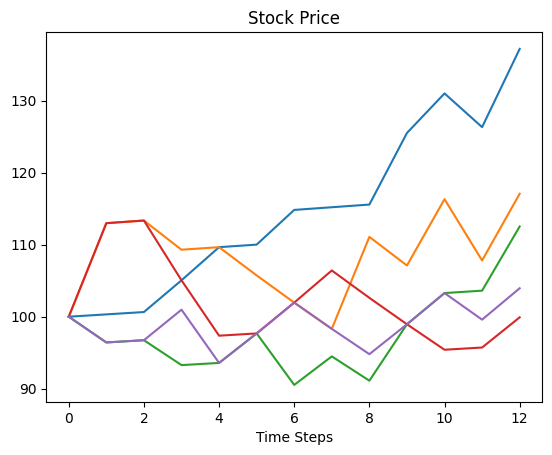

In [13]:
# plot 5 paths
plt.plot(S.T.iloc[:,[100,200,300,400,500]])
plt.xlabel('Time Steps')
plt.title('Stock Price')
plt.show()

In [14]:
BLOCK_SIZE = 1000
NUM_BLOCKS = 10
NUM_S = 12
NUM_TIME_STEPS = 10
dt = 1
sigma = 0.1
nu = 1
S0 = 1
lmbda = 0.01

EPSILON = 0.1
ALPHA = 0.5
GAMMA = 1

ACTIONS = [0,1,2,3]

START = [NUM_BLOCKS -1, S0,0]

In [21]:
def step(state, action):
    X, S, t = state
    
    if action > X:
        action = X
    
    X_next = X - action
    
    S_next = (S*np.exp(1-nu*action)
              + sigma*S*np.sqrt(dt)*np.random.randn())
    
    S_next = np.clip(np.ceil(S_next), 0, NUM_S-1)
    
    next_state = [X_next, int(S_next),t+dt]
    
    mu = (np.exp(1-nu*action)-1)/dt
    var = S_next**2*np.exp(2*mu*dt+sigma**2*dt)*(np.exp(sigma**2*dt)-1)
    
    reward = BLOCK_SIZE*action*S-lmbda*BLOCK_SIZE*X_next**2*var
    
    return next_state, reward

In [22]:
# Check some state, action pairs and the associated reward
print(step(START, 0))
print(step([1,30,2], 0))

([9, 3, 1], -2299.981739633371)
([1, 11, 3], -381.7527990337968)


In [24]:
def choose_action(state,q_value,eps=EPSILON):
    if np.random.binomial(1,eps)==1:
        action = np.random.choice(ACTIONS)
    else:
        values_ = q_value[state[0],state[1],state[2],:]
        action = np.random.choice(
            [action_ for action_,value_ in enumerate(values_)
             if value_ == np.max(values_)])
    if action>state[0]:
        action=state[0]
    return action

In [25]:
def sarsa(q_value, expected=False,step_size=ALPHA, eps=EPSILON):
    state = START
    action = choose_action(state,q_value,eps)
    rewards =0.0
    
    while (state[2]<(NUM_TIME_STEPS-1)*dt) and (state[0]>0):
        next_state, reward = step(state, action)
        next_action = choose_action(next_state, q_value, eps)
        rewards += reward
        if not expected:
            target = q_value[next_state[0],next_state[1],next_state[2],next_action]
        else:
            target = 0.0
            q_next = q_value[next_state[0],next_state[1],next_state[2],:]
            best_actions = np.argwhere(q_next == np.max(q_next))
            for action_ in ACTIONS:
                if action_ in best_actions:
                    target += ((1.0 - eps) / len(best_actions) 
                               + eps / len(ACTIONS)) * q_value[next_state[0], next_state[1], next_state[2], action_]
                else:
                    target += eps / len(ACTIONS) * q_value[next_state[0], next_state[1], next_state[2], action_]
        target *= GAMMA
        q_value[state[0],state[1],state[2],action] += step_size*(
            reward +target-q_value[state[0],state[1],state[2],action])
        state = next_state
        action = next_action
    return rewards

In [26]:
def q_learning(q_value,step_size=ALPHA,eps=EPSILON):
    state = START
    rewards = 0.0
    
    while (state[2]<(NUM_TIME_STEPS-1)*dt) and (state[0]>0):
        action = choose_action(state,q_value,eps)
        next_state,reward = step(state,action)
        rewards += reward
        Qhere = q_value[state[0], state[1], state[2], action]
        
        bestQnext = max(q_value[next_state[0], next_state[1], next_state[2], :])
        
        nextQhere = Qhere + step_size*(reward + GAMMA*bestQnext - Qhere)
        
        q_value[state[0], state[1], state[2], action] += step_size * (reward 
            + GAMMA * np.max(q_value[next_state[0], next_state[1], next_state[2], :]) 
            - q_value[state[0], state[1], state[2], action])
        
        if nextQhere !=  q_value[state[0], state[1], state[2], action]:
            print()
        
        state = next_state
    return rewards

In [27]:
def figure(episodes=1000, runs=100):
    EPOCH=25
    
    # Initialise the rewards arrays
    rewards_sarsa = np.zeros(episodes)
    rewards_q_learning = np.zeros(episodes)
    
    for r in tqdm(range(runs)):
        # Initialise the state-action arrays 
        q_sarsa = np.zeros((NUM_BLOCKS, NUM_S, NUM_TIME_STEPS, len(ACTIONS)))
        q_q_learning = np.copy(q_sarsa)
        # Update the rewards and action value arrays for each episode
        for i in range(0, episodes):
            # The value of epsilon is decremented exponentially
            # after every EPOCH episodes
            eps = EPSILON*((1-EPSILON)**(i//EPOCH))
            rewards_sarsa[i] += sarsa(q_sarsa, eps=eps)
            rewards_q_learning[i] += q_learning(q_q_learning, eps=eps)
    
    # Averaging over independent runs
    rewards_sarsa /= runs
    rewards_q_learning /= runs
    
    # Draw reward curves
    plt.plot(rewards_sarsa, label='Sarsa')
    plt.plot(rewards_q_learning, label='Q-Learning')
    plt.xlabel('Episodes')
    plt.ylabel('Sum of rewards during episode')
    plt.legend()

    return q_sarsa, q_q_learning

100%|█████████████████████████████████████████| 500/500 [05:36<00:00,  1.49it/s]


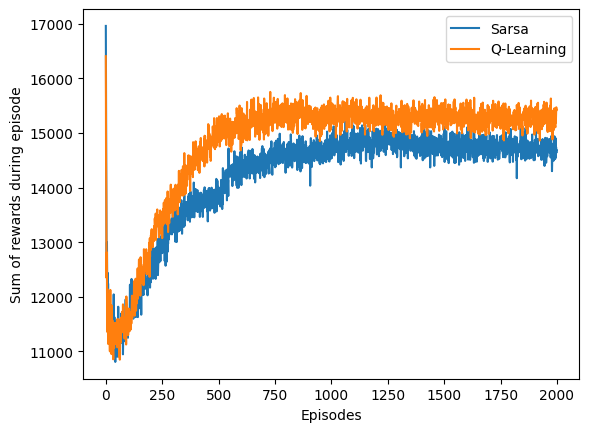

In [30]:
q_sarsa, q_q_learning = figure(2000, 500)
